In [8]:
"""Generate error bar plot"""

import numpy as np
import matplotlib.pyplot as plt
from utils import get_narx_terms, fastcan_pruned_narx, get_r2, get_dual_stable_equilibria_data, random_pruned_narx


def _plot_errorbar(u, y, n_sample_lower, n_sample_upper, n_steps, twinx, figure_name, intercept=True):
    poly_terms, y, narx = get_narx_terms(u, y)

    n_random = 10
    sample_step = int((n_sample_upper - n_sample_lower) / (n_steps - 1))
    r2_fastcan = np.zeros((n_random, n_steps))
    r2_random = np.zeros((n_random, n_steps))
    for i in range(n_random):
        print(figure_name, "   ", f"Random test: {i+1}/{n_random}")
        for j in range(n_steps):
            coef = fastcan_pruned_narx(
                poly_terms, y, j * sample_step + n_sample_lower, i, intercept=intercept
            )
            r2_fastcan[i, j] = get_r2(
                coef, narx
            )

            coef = random_pruned_narx(
                poly_terms, y, j * sample_step + n_sample_lower, i, intercept=intercept
            )
            r2_random[i, j] = get_r2(
                coef, narx
            )

    x = np.linspace(n_sample_lower, n_sample_upper, n_steps, endpoint=True)
    fig, ax1 = plt.subplots()
    if twinx:
        ax2 = ax1.twinx()
        ax2.errorbar(
            x,
            r2_random.mean(axis=0),
            yerr=r2_random.std(axis=0) / 3,
            color="tab:orange",
            label="Random",
        )
        ax2.set_ylabel("R2")
    else:
        ax1.errorbar(
            x,
            r2_random.mean(axis=0),
            yerr=r2_random.std(axis=0) / 3,
            color="tab:orange",
            label="Random",
        )
    ax1.errorbar(
        x,
        r2_fastcan.mean(axis=0),
        yerr=r2_fastcan.std(axis=0) / 3,
        color="tab:blue",
        label="FastCan",
    )
    fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.88))
    ax1.set_ylabel("R2")
    ax1.set_xlabel("Number of Samples")
    ax1.set_xticks(x)
    plt.show()
    # fig.savefig(figure_name, bbox_inches="tight")
    # plt.close()
    # print("Image " + figure_name + " has been generated.")

def _plot_atom(u, y, n_atoms_list, n_samples, figure_name, intercept=True):
    poly_terms, y, narx = get_narx_terms(u, y, intercept)

    n_random = 10
    r2_fastcan = np.zeros((n_random, len(n_atoms_list)))
    for i in range(n_random):
        print(figure_name, "   ", f"Random test: {i+1}/{n_random}")
        for j, n_atoms in enumerate(n_atoms_list):
            coef = fastcan_pruned_narx(
                poly_terms,
                y,
                n_samples,
                i,
                n_atoms=n_atoms,
                intercept=intercept,
            )
            r2_fastcan[i, j] = get_r2(coef, narx)

    plt.boxplot(r2_fastcan, tick_labels=n_atoms_list)
    plt.ylabel("R2")
    plt.xlabel("No. of Atoms")

    plt.show()

    # plt.savefig(figure_name, bbox_inches="tight")
    # plt.close()
    # print("Image " + figure_name + " has been generated.")

atom_dsed.png     Random test: 1/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 2/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 3/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 4/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 5/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 6/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
atom_dsed.png     Random test: 7/10
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 600/600
Progress: 

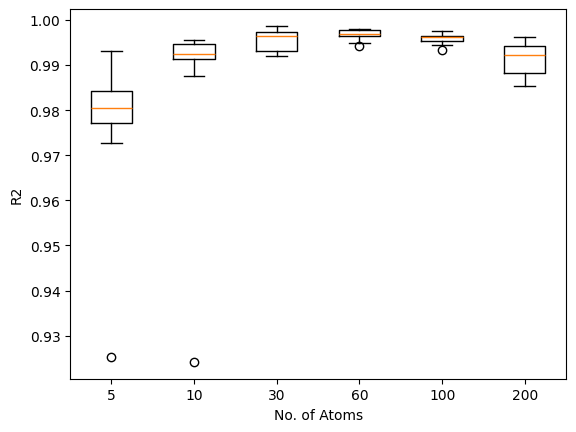

In [3]:
train_val_u, train_val_y, _ = get_dual_stable_equilibria_data()
_plot_atom(
    train_val_u,
    train_val_y,
    [5, 10, 30, 60, 100, 200],
    600,
    "atom_dsed.png",
)

errorbar_dsed.png     Random test: 1/10
Progress: 300/300
Progress: 330/330
Progress: 360/360
Progress: 390/390
Progress: 420/420
Progress: 450/450
Progress: 480/480
Progress: 510/510
Progress: 540/540
Progress: 570/570
Progress: 600/600
errorbar_dsed.png     Random test: 2/10
Progress: 300/300
Progress: 330/330
Progress: 360/360
Progress: 390/390
Progress: 420/420
Progress: 450/450
Progress: 480/480
Progress: 510/510
Progress: 540/540
Progress: 570/570
Progress: 600/600
errorbar_dsed.png     Random test: 3/10
Progress: 300/300
Progress: 330/330
Progress: 360/360
Progress: 390/390
Progress: 420/420
Progress: 450/450
Progress: 480/480
Progress: 510/510
Progress: 540/540
Progress: 570/570
Progress: 600/600
errorbar_dsed.png     Random test: 4/10
Progress: 300/300
Progress: 330/330
Progress: 360/360
Progress: 390/390
Progress: 420/420
Progress: 450/450
Progress: 480/480
Progress: 510/510
Progress: 540/540
Progress: 570/570
Progress: 600/600
errorbar_dsed.png     Random test: 5/10
Progress

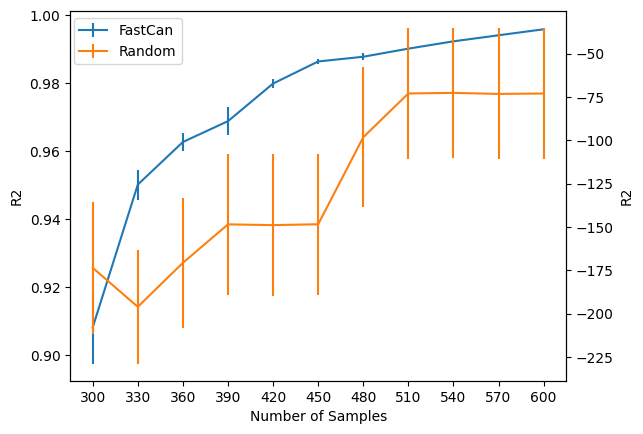

In [9]:
train_val_u, train_val_y, _ = get_dual_stable_equilibria_data()
_plot_errorbar(
    train_val_u, train_val_y, 300, 600, 11, True, "errorbar_dsed.png"
)

In [106]:
def _plot_atom_vs_sample(
    u,
    y,
    n_sample_lower,
    n_sample_upper,
    n_sample_steps,
    n_atom_lower,
    n_atom_upper,
    n_atom_steps,
    twinx,
    figure_name,
    intercept=True
):
    poly_terms, y, narx = get_narx_terms(u, y)

    n_random = 1
    sample_step = int((n_sample_upper - n_sample_lower) / (n_sample_steps - 1))
    atom_step = int((n_atom_upper - n_atom_lower) / (n_atom_steps - 1))
    r2_fastcan = np.zeros((n_random, n_sample_steps, n_atom_steps))
    for i in range(n_random):
        print(figure_name, "   ", f"Random test: {i+1}/{n_random}")
        for j in range(n_sample_steps):
            for k in range(n_atom_steps):
                coef = fastcan_pruned_narx(
                    poly_terms,
                    y,
                    n_samples_to_select=j * sample_step + n_sample_lower,
                    random_state=i,
                    n_atoms=k * atom_step + n_atom_lower,
                    intercept=intercept
                )
                r2_fastcan[i, j, k] = get_r2(
                    coef, narx
                )

    return r2_fastcan

    # x = np.linspace(n_sample_lower, n_sample_upper, n_sample_steps, endpoint=True)
    # fig, ax1 = plt.subplots()
    # if twinx:
    #     ax2 = ax1.twinx()
    #     ax2.errorbar(
    #         x,
    #         r2_random.mean(axis=0),
    #         yerr=r2_random.std(axis=0) / 3,
    #         color="tab:orange",
    #         label="Random",
    #     )
    #     ax2.set_ylabel("R2")
    # else:
    #     ax1.errorbar(
    #         x,
    #         r2_random.mean(axis=0),
    #         yerr=r2_random.std(axis=0) / 3,
    #         color="tab:orange",
    #         label="Random",
    #     )
    # ax1.errorbar(
    #     x,
    #     r2_fastcan.mean(axis=0),
    #     yerr=r2_fastcan.std(axis=0) / 3,
    #     color="tab:blue",
    #     label="FastCan",
    # )
    # fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.88))
    # ax1.set_ylabel("R2")
    # ax1.set_xlabel("Number of Samples")
    # ax1.set_xticks(x)
    # plt.show()

a = _plot_atom_vs_sample(
    train_val_u,
    train_val_y,
    300,
    600,
    11,
    3,
    120,
    40,
    True,
    "errorbar_atom_vs_sample_dsed.png",
)

errorbar_atom_vs_sample_dsed.png     Random test: 1/1
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 300/300
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 330/330
Progress: 

In [105]:
n_atom_lower = 100
n_atom_upper = 2000
n_atom_steps = 20
atom_step = int((n_atom_upper - n_atom_lower) / (n_atom_steps - 1))
(n_atom_steps - 1) * atom_step + n_atom_lower

2000

In [78]:
(120-3)/9

13.0

In [14]:
atom_step

48

In [15]:
4 * atom_step + n_atom_lower

197

In [ ]:
117/3/

39.0

In [87]:
np.linspace(3, 120, 40, endpoint=True)

array([  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
        36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,
        69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108., 111., 114., 117., 120.])

In [12]:
a.shape

(10, 11, 5)

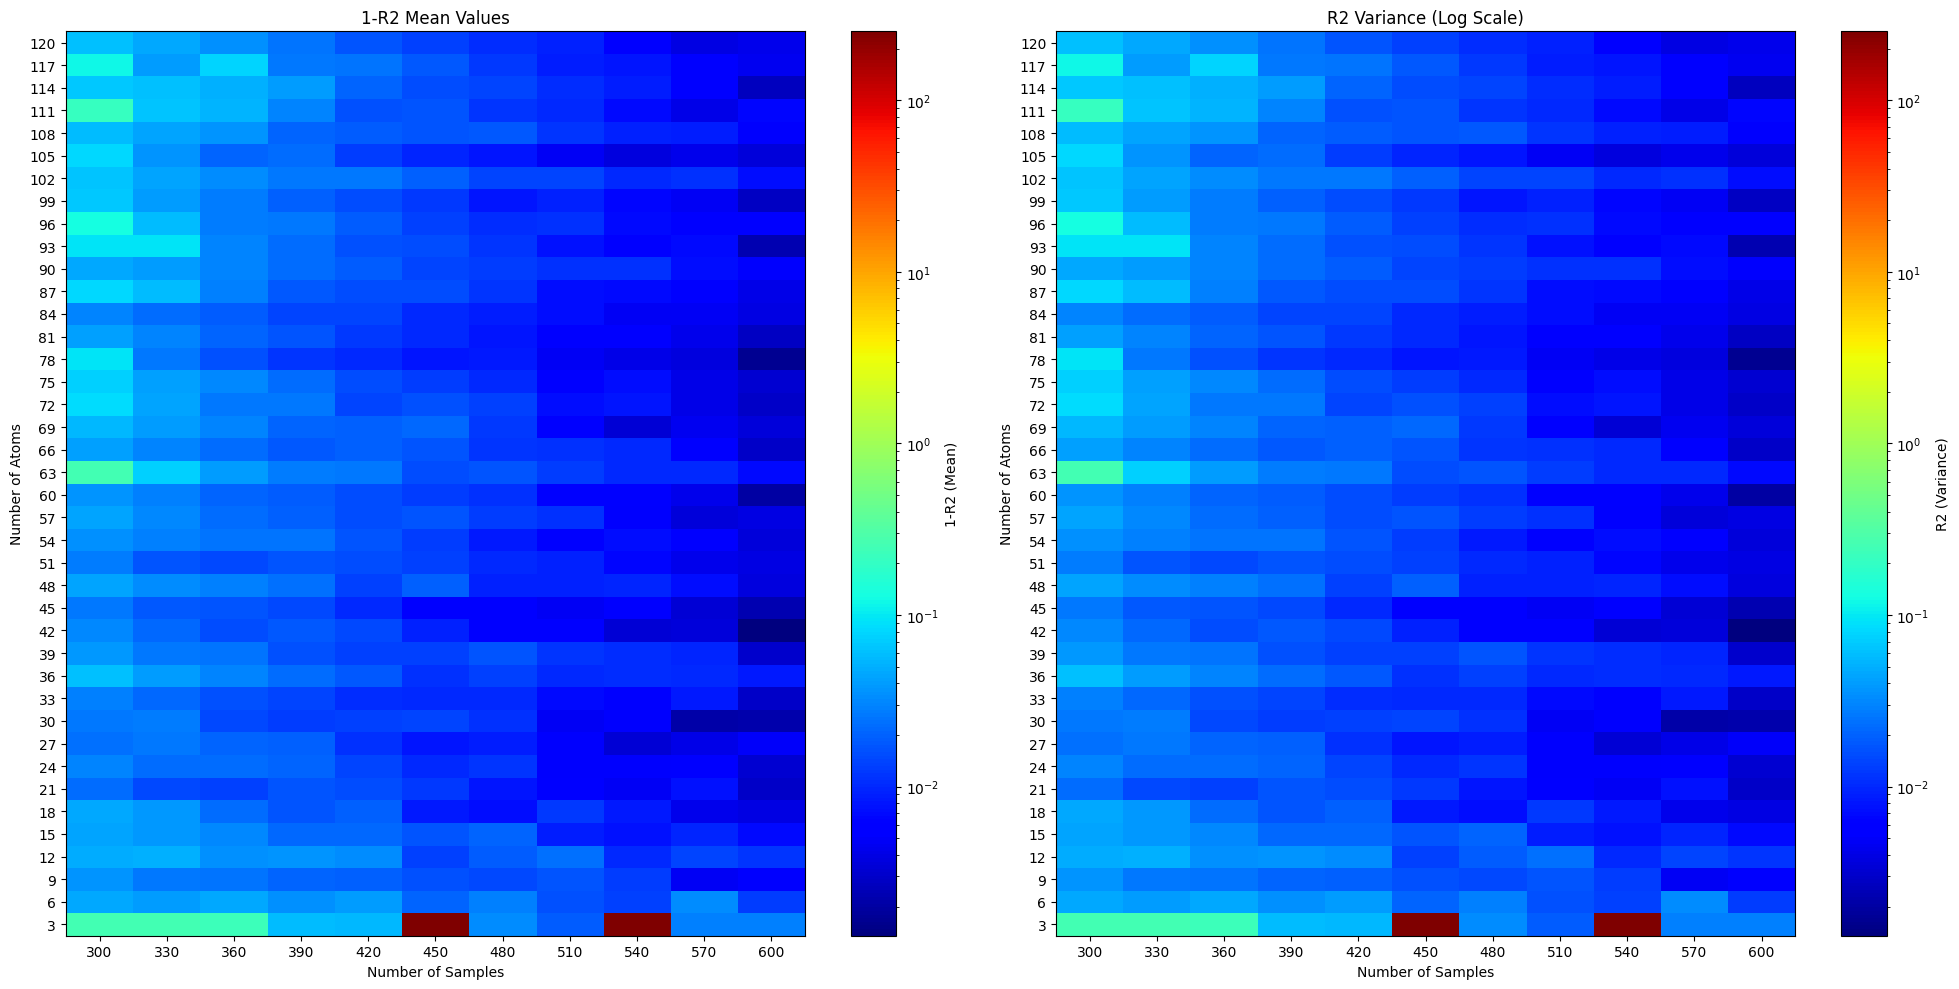

In [107]:
# Right subplot - Variance with log scale
from matplotlib.colors import LogNorm

# Average along the first axis (axis=0) and compute variance
a_mean = 1-a.mean(axis=0)
a_var = 1-a.mean(axis=0)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Left subplot - Mean values
im1 = ax1.imshow(a_mean.T, cmap='jet', aspect='auto', origin='lower',
                 norm=LogNorm(vmin=a_mean.min(), vmax=a_mean.max()))
cbar1 = plt.colorbar(im1, ax=ax1, label='1-R2 (Mean)')


im2 = ax2.imshow(a_var.T, cmap='jet', aspect='auto', origin='lower', 
                 norm=LogNorm(vmin=a_var.min(), vmax=a_var.max()))
cbar2 = plt.colorbar(im2, ax=ax2, label='R2 (Variance)')

# Set labels for both subplots
n_sample_lower = 300
n_sample_upper = 600
n_sample_steps = 11
n_atom_lower = 3
n_atom_upper = 120
n_atom_steps = 40

sample_ticks = np.linspace(n_sample_lower, n_sample_upper, n_sample_steps, endpoint=True)
atom_ticks = np.linspace(n_atom_lower, n_atom_upper, n_atom_steps, endpoint=True)

for ax in [ax1, ax2]:
    ax.set_xticks(range(n_sample_steps))
    ax.set_xticklabels([f'{int(x)}' for x in sample_ticks])
    ax.set_yticks(range(n_atom_steps))
    ax.set_yticklabels([f'{int(x)}' for x in atom_ticks])
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('Number of Atoms')

ax1.set_title('1-R2 Mean Values')
ax2.set_title('R2 Variance (Log Scale)')

plt.tight_layout()
plt.show()

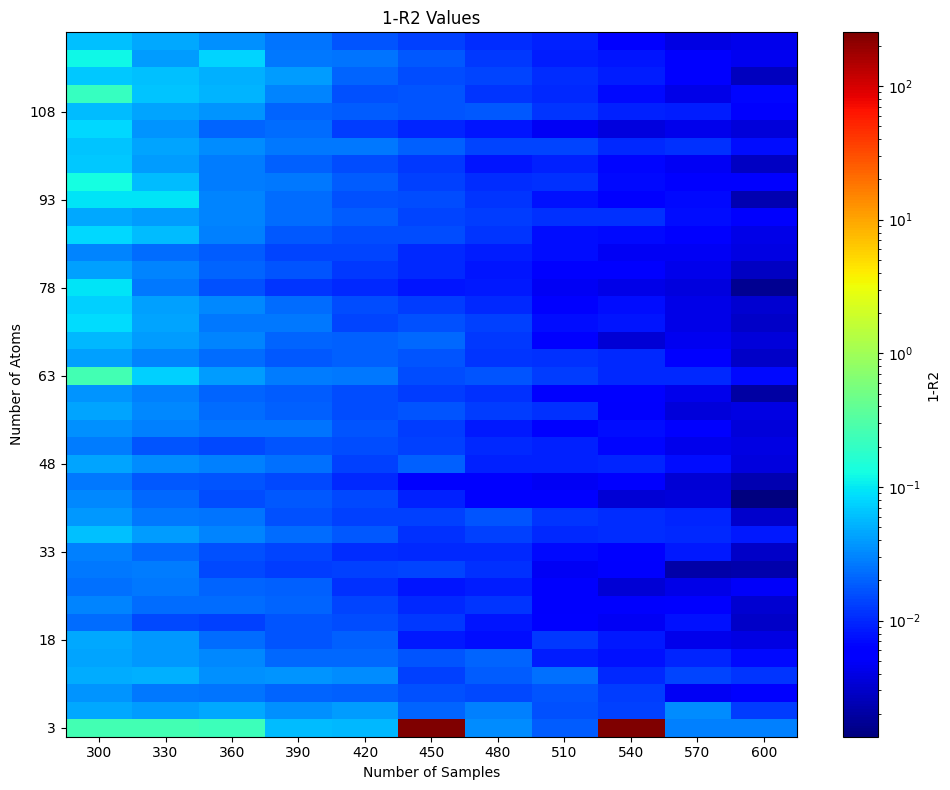

In [112]:
from matplotlib.colors import LogNorm

# Average along the first axis (axis=0)
a_mean = 1 - a.mean(axis=0)

# Create single plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot mean values
im = ax.imshow(a_mean.T, cmap='jet', aspect='auto', origin='lower',
               norm=LogNorm(vmin=a_mean.min(), vmax=a_mean.max()))
cbar = plt.colorbar(im, ax=ax, label='1-R2')

# Set labels
n_sample_lower = 300
n_sample_upper = 600
n_sample_steps = 11
n_atom_lower = 3
n_atom_upper = 120
n_atom_steps = 40

sample_ticks = np.linspace(n_sample_lower, n_sample_upper, n_sample_steps, endpoint=True)
atom_ticks = np.linspace(n_atom_lower, n_atom_upper, n_atom_steps, endpoint=True)


ax.set_xticks(range(n_sample_steps))
ax.set_xticklabels([f'{int(x)}' for x in sample_ticks])
ax.set_yticks(y_tick_indices)
ax.set_yticklabels(y_tick_labels)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Number of Atoms')
ax.set_title('1-R2 Values')

plt.tight_layout()
plt.show()

In [43]:
np.log(a_mean)

array([[  9.56273322,   9.11551981,   8.53508867,  -8.05933718,
         -9.64397449,  -8.89639514,  -9.67798814],
       [  9.54691025,   8.65485025,   8.53981703,  -9.19433984,
         -9.68786368,  -9.85712485,  -9.66672795],
       [  9.49846406,   8.65403946,   8.54254767,  -8.81559121,
         -9.71093357,  -9.84332805,  -9.48235867],
       [  9.50701965,   8.65343827,  -6.94038453,  -9.00894412,
        -10.03647949, -11.24886305, -10.49659212],
       [  9.52986669,   9.1918846 ,   8.5750335 ,  -9.54797334,
         -9.7572073 , -10.61183419, -10.47935191],
       [  9.57653248,   8.56481079, -11.06179589,  -9.87277907,
        -10.93600955, -11.97381563, -11.08695269],
       [  9.57481067,   8.65173951,  -7.30421921, -10.5661721 ,
        -10.68839794, -11.50704898, -11.27025226],
       [  9.64476   ,   8.65309995,   8.59325177,  -9.73579568,
        -11.01328611, -11.79769155, -11.94491999],
       [  9.11557654,   9.19152496,   8.59653124,  -9.60629186,
        -12.0319